# Import von Libarys


In [1]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D, Input
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential

import pathlib
from pathlib import Path
import random
import math
import cv2  

E:\Programme\anaconda\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Programme\anaconda\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Programme\anaconda\envs\PythonGPU\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Programme\anaconda\envs\PythonGPU\lib\site-packages\tensorflow\pyth

# Pfade und modellloading

In [2]:
model_1_name = "CNN_16_96_128_epochs_5_relu_RMSprop_categorical_crossentropy_padding_same"
model_2_name = "CNN_16_96_128_epochs_5_relu_RMSprop_categorical_crossentropy_padding_same_augmented_fresh_trained_500_class+train"
model_folder_name = "Optimization Results"

image_folder_name ="final_images"
image_folder = Path(image_folder_name)

model_1_path = Path(model_folder_name) / model_1_name
model_2_path = Path(model_folder_name) / model_2_name

model_1 = keras.models.load_model(model_1_path)
model_2 = keras.models.load_model(model_2_path)


# loading test data

In [3]:
X_test = np.load("test_data.npy")
y_test = np.load('test_labels.npy')

# Generate 'random' numbers to corupt Data

In [4]:
random.seed(a=50)
rand_depth=21

act_classes = np.argmax(y_test, axis=1)
r_numbers=np.zeros(act_classes.size)
r_positions=np.zeros((rand_depth,act_classes.size,2))

for i in range(0,act_classes.size):
    r_numbers[i]=random.random()
    
for k in range(0,rand_depth):
    for i in range(0,act_classes.size):
        r_positions[k,i,0]=random.randint(0, 47)
        r_positions[k,i,1]=random.randint(0, 47)

    
    
    
r_positions=r_positions.astype(int)

# testfunktion wie die zufallszahlen ausfallen

In [5]:
def Corruption_Test (r_numbers,p):
    j=0
    k=0
    for i in range(0,r_numbers.shape[0]):
        j+=1
        if r_numbers[i]<=p:
            k+=1
        
    
    return[k/j]

# Pixelattack function


In [6]:
def Pixel_attack (old_Data ,r_numbers, r_positions, p,n):
    Data=np.copy(old_Data)
    for i in range(0,r_numbers.shape[0]):
        if r_numbers[i]<=p:
            for k in range(0,n):
                Data[i,r_positions[k,i,0],r_positions[k,i,1],0]=0
                Data[i,r_positions[k,i,0],r_positions[k,i,1],1]=0
                Data[i,r_positions[k,i,0],r_positions[k,i,1],2]=0
                
                
    return[Data]


# onepixel Attack, modell 1


In [7]:
#acc to coruption level
act_classes = np.argmax(y_test, axis=1)
hits = np.zeros(21)
trys = np.zeros(21)


for i in range (0,21):
    pred_classes=np.argmax(model_1.predict(Pixel_attack(X_test,r_numbers,r_positions,i*0.05,1)), axis=1)
    #print("Prediction for " + str(i*0.05) + " abgeschlossen")
    print("Actual Corruption: " + str(Corruption_Test(r_numbers,i*0.05)))
    
    
    for j in range(0,int(pred_classes.size)):
        trys[i]+=1
        if pred_classes[j]==act_classes[j]:
            hits[i]+=1
    
partial_pixel_1 = hits / trys 
print(partial_pixel_1)

Actual Corruption: [0.0]
Actual Corruption: [0.049987419273672735]
Actual Corruption: [0.09519416254298414]
Actual Corruption: [0.14484609578126312]
Actual Corruption: [0.19466577203723895]
Actual Corruption: [0.24347899018703348]
Actual Corruption: [0.29413738153149377]
Actual Corruption: [0.3438731862786212]
Actual Corruption: [0.39704772288853474]
Actual Corruption: [0.4482093432860857]
Actual Corruption: [0.5006290363163634]
Actual Corruption: [0.550616455590036]
Actual Corruption: [0.6011909754256479]
Actual Corruption: [0.6505912941373815]
Actual Corruption: [0.6979786966367525]
Actual Corruption: [0.7462886857334563]
Actual Corruption: [0.7963599765159776]
Actual Corruption: [0.8486119265285582]
Actual Corruption: [0.8973412731695043]
Actual Corruption: [0.9474125639520254]
Actual Corruption: [1.0]
[0.99320641 0.99312254 0.99303866 0.99278705 0.99278705 0.99278705
 0.99261931 0.99253544 0.99245156 0.99245156 0.99245156 0.99236769
 0.99219995 0.99219995 0.99203221 0.99203221 0.99

# onepixel Attack, modell 2


In [8]:
#acc to coruption level
act_classes = np.argmax(y_test, axis=1)
hits = np.zeros(21)
trys = np.zeros(21)


for i in range (0,21):
    pred_classes=np.argmax(model_2.predict(Pixel_attack(X_test,r_numbers,r_positions,i*0.05,1)), axis=1)
    #print("Prediction for " + str(i*0.05) + " abgeschlossen")
    print("Actual Corruption: " + str(Corruption_Test(r_numbers,i*0.05)))
    
    
    for j in range(0,int(pred_classes.size)):
        trys[i]+=1
        if pred_classes[j]==act_classes[j]:
            hits[i]+=1
    
partial_pixel_2 = hits / trys 
print(partial_pixel_2)

Actual Corruption: [0.0]
Actual Corruption: [0.049987419273672735]
Actual Corruption: [0.09519416254298414]
Actual Corruption: [0.14484609578126312]
Actual Corruption: [0.19466577203723895]
Actual Corruption: [0.24347899018703348]
Actual Corruption: [0.29413738153149377]
Actual Corruption: [0.3438731862786212]
Actual Corruption: [0.39704772288853474]
Actual Corruption: [0.4482093432860857]
Actual Corruption: [0.5006290363163634]
Actual Corruption: [0.550616455590036]
Actual Corruption: [0.6011909754256479]
Actual Corruption: [0.6505912941373815]
Actual Corruption: [0.6979786966367525]
Actual Corruption: [0.7462886857334563]
Actual Corruption: [0.7963599765159776]
Actual Corruption: [0.8486119265285582]
Actual Corruption: [0.8973412731695043]
Actual Corruption: [0.9474125639520254]
Actual Corruption: [1.0]
[0.99605804 0.99597417 0.99597417 0.99597417 0.99572255 0.99563868
 0.99563868 0.99563868 0.99555481 0.99563868 0.99572255 0.99572255
 0.99572255 0.99572255 0.99572255 0.99572255 0.99

# Multibar plot partial_pixel_

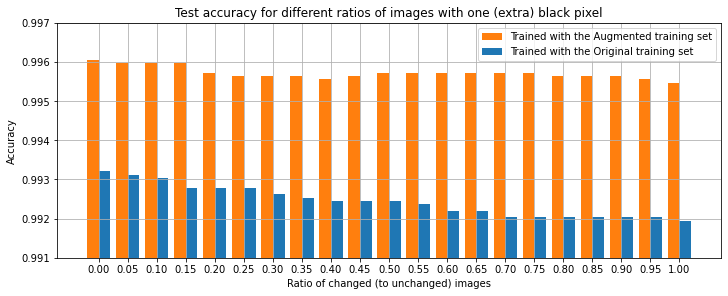

In [9]:

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.02  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,21)*0.05-0.01,partial_pixel_2, width, color='tab:orange', label='Trained with the Augmented training set')
barlist2= axs.bar(np.arange(0,21)*0.05+0.01,partial_pixel_1, width, color='tab:blue', label='Trained with the Original training set')

axs.set_xticks(np.arange(0,21)*0.05)#, rotation='vertical')
#axs.set_xlim(xmax=43,xmin=-1)
axs.set_ylim(ymax=0.997,ymin=0.991)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Ratio of changed (to unchanged) images')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy for different ratios of images with one (extra) black pixel')
plt.legend()
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
plt.savefig(image_folder / 'partial_pixel_m.png', dpi=500)

# plot partial_pixel_1


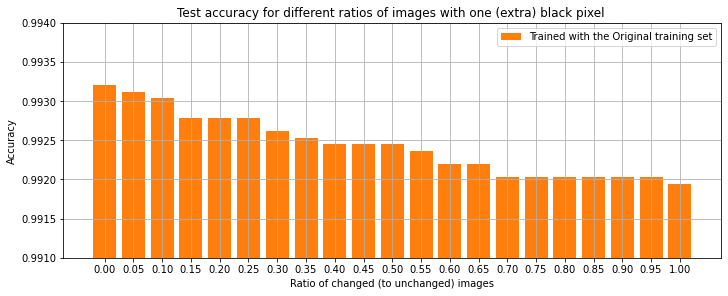

In [10]:

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.04  # the width of the bars
axs.grid(True)

barlist2= axs.bar(np.arange(0,21)*0.05,partial_pixel_1, width, color='tab:orange', label='Trained with the Original training set')

axs.set_xticks(np.arange(0,21)*0.05)#, rotation='vertical')
#axs.set_xlim(xmax=43,xmin=-1)
axs.set_ylim(ymax=0.994,ymin=0.991)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Ratio of changed (to unchanged) images')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy for different ratios of images with one (extra) black pixel ')
plt.legend()
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
plt.savefig(image_folder / 'partial_pixel_1.png', dpi=500)

# plot partial_pixel_2


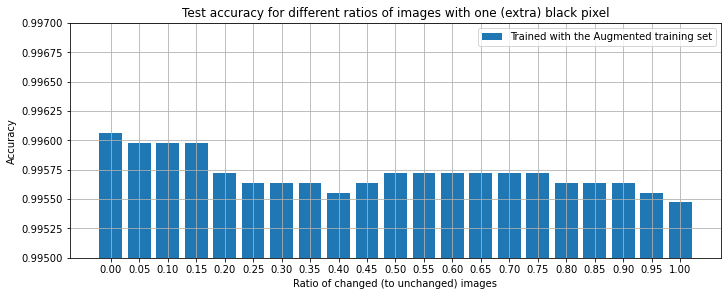

In [11]:

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.04  # the width of the bars
axs.grid(True)

barlist2= axs.bar(np.arange(0,21)*0.05,partial_pixel_2, width, color='tab:blue', label='Trained with the Augmented training set')

axs.set_xticks(np.arange(0,21)*0.05)#, rotation='vertical')
#axs.set_xlim(xmax=43,xmin=-1)
axs.set_ylim(ymax=0.997,ymin=0.995)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Ratio of changed (to unchanged) images')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy for different ratios of images with one (extra) black pixel')
plt.legend()
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
plt.savefig(image_folder / 'partial_pixel_2.png', dpi=500)

# Attacke mit mehr als einem pixel, Modell 1

In [12]:
act_classes = np.argmax(y_test, axis=1)
hits = np.zeros(21)
trys = np.zeros(21)


for i in range (0,21):
    pred_classes=np.argmax(model_1.predict(Pixel_attack(X_test,r_numbers,r_positions,1,i)), axis=1)
    print("Prediction for " + str(i) + " abgeschlossen")
    
    
    
    for j in range(0,int(pred_classes.size)):
        trys[i]+=1
        if pred_classes[j]==act_classes[j]:
            hits[i]+=1
    
more_pixels_1 = hits / trys 
print(more_pixels_1)

Prediction for 0 abgeschlossen
Prediction for 1 abgeschlossen
Prediction for 2 abgeschlossen
Prediction for 3 abgeschlossen
Prediction for 4 abgeschlossen
Prediction for 5 abgeschlossen
Prediction for 6 abgeschlossen
Prediction for 7 abgeschlossen
Prediction for 8 abgeschlossen
Prediction for 9 abgeschlossen
Prediction for 10 abgeschlossen
Prediction for 11 abgeschlossen
Prediction for 12 abgeschlossen
Prediction for 13 abgeschlossen
Prediction for 14 abgeschlossen
Prediction for 15 abgeschlossen
Prediction for 16 abgeschlossen
Prediction for 17 abgeschlossen
Prediction for 18 abgeschlossen
Prediction for 19 abgeschlossen
Prediction for 20 abgeschlossen
[0.99320641 0.99194834 0.99178059 0.99060639 0.99001929 0.9896838
 0.98901283 0.98867735 0.98783863 0.98767089 0.98658056 0.98607733
 0.984987   0.98448377 0.98339344 0.98221924 0.98121278 0.98096117
 0.97987084 0.97903212 0.97810954]


# Attacke mit mehr als einem pixel, Modell 2

In [13]:
act_classes = np.argmax(y_test, axis=1)
hits = np.zeros(21)
trys = np.zeros(21)


for i in range (0,21):
    pred_classes=np.argmax(model_2.predict(Pixel_attack(X_test,r_numbers,r_positions,1,i)), axis=1)
    print("Prediction for " + str(i) + " abgeschlossen")
    
    
    
    for j in range(0,int(pred_classes.size)):
        trys[i]+=1
        if pred_classes[j]==act_classes[j]:
            hits[i]+=1
    
more_pixels_2 = hits / trys 
print(more_pixels_2)

Prediction for 0 abgeschlossen
Prediction for 1 abgeschlossen
Prediction for 2 abgeschlossen
Prediction for 3 abgeschlossen
Prediction for 4 abgeschlossen
Prediction for 5 abgeschlossen
Prediction for 6 abgeschlossen
Prediction for 7 abgeschlossen
Prediction for 8 abgeschlossen
Prediction for 9 abgeschlossen
Prediction for 10 abgeschlossen
Prediction for 11 abgeschlossen
Prediction for 12 abgeschlossen
Prediction for 13 abgeschlossen
Prediction for 14 abgeschlossen
Prediction for 15 abgeschlossen
Prediction for 16 abgeschlossen
Prediction for 17 abgeschlossen
Prediction for 18 abgeschlossen
Prediction for 19 abgeschlossen
Prediction for 20 abgeschlossen
[0.99605804 0.99547094 0.99521932 0.99463222 0.99446448 0.99421287
 0.99345802 0.99337415 0.99261931 0.99203221 0.99110962 0.99069026
 0.99018703 0.99001929 0.98959993 0.98926445 0.98892896 0.98817412
 0.9879225  0.9873354  0.98699992]


# Multibar plot more_pixels_

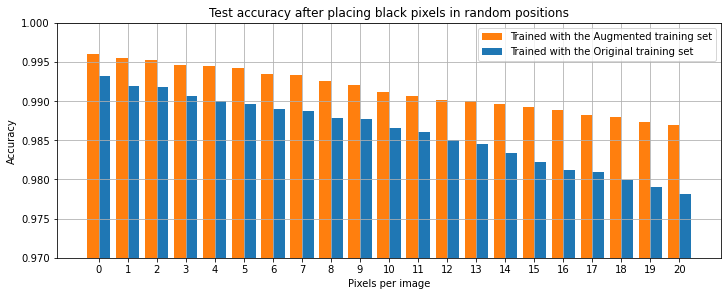

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.4  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,21)-0.2,more_pixels_2, width, color='tab:orange', label='Trained with the Augmented training set')
barlist2= axs.bar(np.arange(0,21)+0.2,more_pixels_1, width, color='tab:blue', label='Trained with the Original training set')





axs.set_xticks(np.arange(0,21))#, rotation='vertical')
#axs.set_xlim(xmax=43,xmin=-1)
axs.set_ylim(ymax=1.00,ymin=0.97)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Pixels per image')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy after placing black pixels in random positions')
plt.legend()
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
plt.savefig(image_folder / 'more_pixels_m.png', dpi=500)

# plot more_pixels_1

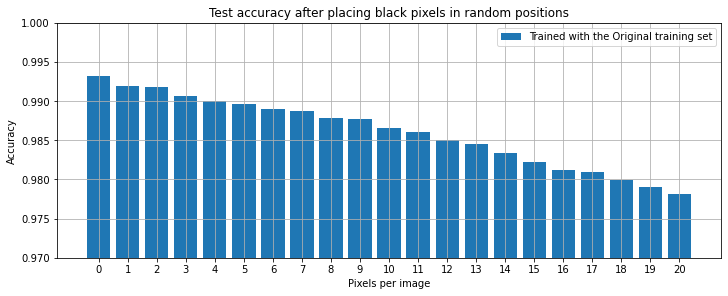

In [15]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.8  # the width of the bars
axs.grid(True)
barlist2= axs.bar(np.arange(0,21),more_pixels_1, width, color='tab:blue', label='Trained with the Original training set')





axs.set_xticks(np.arange(0,21))#, rotation='vertical')
#axs.set_xlim(xmax=43,xmin=-1)
axs.set_ylim(ymax=1.00,ymin=0.97)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Pixels per image')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy after placing black pixels in random positions')
plt.legend()
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
plt.savefig(image_folder / 'more_pixels_1.png', dpi=500)

# plot more_pixels_2

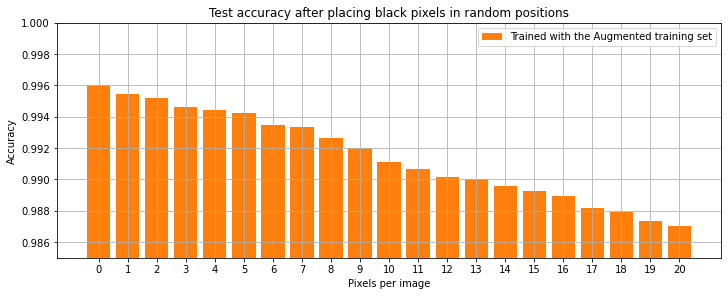

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.8  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,21),more_pixels_2, width, color='tab:orange', label='Trained with the Augmented training set')





axs.set_xticks(np.arange(0,21))#, rotation='vertical')
#axs.set_xlim(xmax=43,xmin=-1)
axs.set_ylim(ymax=1.00,ymin=0.985)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Pixels per image')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy after placing black pixels in random positions')
plt.legend()
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
plt.savefig(image_folder / 'more_pixels_2.png', dpi=500)

# Funtion for bluring pictures

In [17]:

def blur_imgs (old_Data , p,n):
    Data=np.copy(old_Data)

    for i in range(0,r_numbers.shape[0]):   
        if r_numbers[i]<=p:
            
        
                Data[i]=cv2.blur(Data[i], (n,n), cv2.BORDER_DEFAULT)  



    
    return[Data]

# bluring model 1


In [18]:
act_classes = np.argmax(y_test, axis=1)
hits = np.zeros(11)
trys = np.zeros(11)


for i in range (0,11):
    pred_classes=np.argmax(model_1.predict(blur_imgs(X_test,1,i*2+1)), axis=1)
    print("Prediction for " + str(i) + " abgeschlossen")
    
    
    
    for j in range(0,int(pred_classes.size)):
        trys[i]+=1
        if pred_classes[j]==act_classes[j]:
            hits[i]+=1
    
blur_1 = hits / trys 
print(blur_1)

Prediction for 0 abgeschlossen
Prediction for 1 abgeschlossen
Prediction for 2 abgeschlossen
Prediction for 3 abgeschlossen
Prediction for 4 abgeschlossen
Prediction for 5 abgeschlossen
Prediction for 6 abgeschlossen
Prediction for 7 abgeschlossen
Prediction for 8 abgeschlossen
Prediction for 9 abgeschlossen
Prediction for 10 abgeschlossen
[0.99320641 0.99010316 0.96292879 0.87947664 0.75878554 0.59791999
 0.45886102 0.35712488 0.28356957 0.21722721 0.1610333 ]


# bluring model 2

In [19]:
act_classes = np.argmax(y_test, axis=1)
hits = np.zeros(11)
trys = np.zeros(11)


for i in range (0,11):
    pred_classes=np.argmax(model_2.predict(blur_imgs(X_test,1,i*2+1)), axis=1)
    print("Prediction for " + str(i) + " abgeschlossen")
    
    
    
    for j in range(0,int(pred_classes.size)):
        trys[i]+=1
        if pred_classes[j]==act_classes[j]:
            hits[i]+=1
    
blur_2 = hits / trys 
print(blur_2)

Prediction for 0 abgeschlossen
Prediction for 1 abgeschlossen
Prediction for 2 abgeschlossen
Prediction for 3 abgeschlossen
Prediction for 4 abgeschlossen
Prediction for 5 abgeschlossen
Prediction for 6 abgeschlossen
Prediction for 7 abgeschlossen
Prediction for 8 abgeschlossen
Prediction for 9 abgeschlossen
Prediction for 10 abgeschlossen
[0.99605804 0.99521932 0.9723224  0.88367022 0.74150801 0.58282311
 0.44703514 0.36047975 0.29707288 0.24305963 0.19667869]


# mulitplot bluring

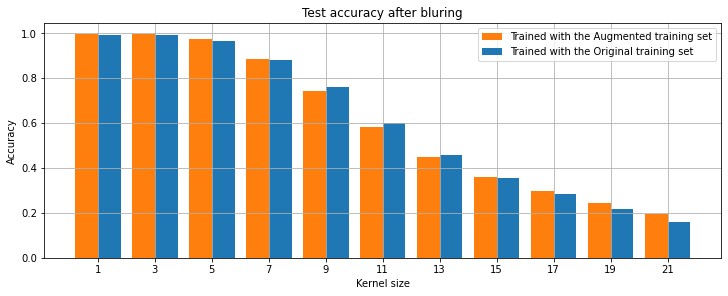

In [20]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.8  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,11)*2+1-0.4,blur_2, width, color='tab:orange', label='Trained with the Augmented training set')
barlist2= axs.bar(np.arange(0,11)*2+1+0.4,blur_1, width, color='tab:blue', label='Trained with the Original training set')





axs.set_xticks(np.arange(0,11)*2+1)#, rotation='vertical')
#axs.set_xlim(xmax=43,xmin=-1)
#axs.set_ylim(ymax=1.00,ymin=0.97)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Kernel size')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy after bluring')
plt.legend()
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
plt.savefig(image_folder / 'blur_m.png', dpi=500)

# plot blur, modell 1

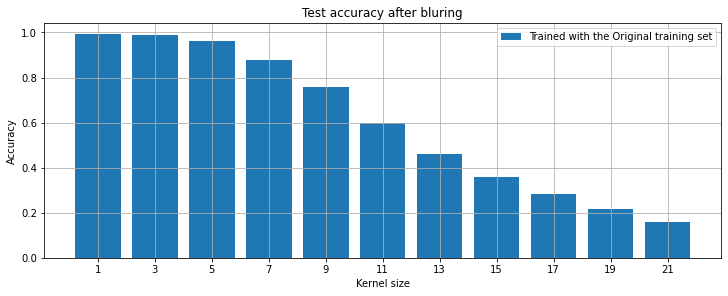

In [21]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 1.6  # the width of the bars
axs.grid(True)
barlist2= axs.bar(np.arange(0,11)*2+1,blur_1, width, color='tab:blue', label='Trained with the Original training set')





axs.set_xticks(np.arange(0,11)*2+1)#, rotation='vertical')
#axs.set_xlim(xmax=43,xmin=-1)
#axs.set_ylim(ymax=1.00,ymin=0.97)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Kernel size')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy after bluring')
plt.legend()
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
plt.savefig(image_folder / 'blur_1.png', dpi=500)


# plot blur, modell 2

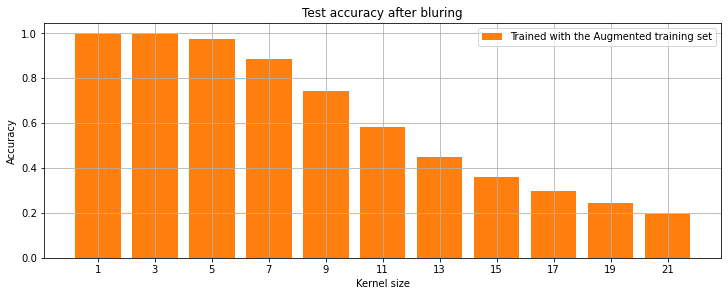

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 1.6  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,11)*2+1,blur_2, width, color='tab:orange', label='Trained with the Augmented training set')





axs.set_xticks(np.arange(0,11)*2+1)#, rotation='vertical')
#axs.set_xlim(xmax=43,xmin=-1)
#axs.set_ylim(ymax=1.00,ymin=0.97)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Kernel size')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy after bluring')
plt.legend()
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
plt.savefig(image_folder / 'blur_2.png', dpi=500)

# Funtion for sharpening pictures

In [23]:
def sharpen (old_Data , p,n):
    Data=np.copy(old_Data)
    filter = np.ones((n,n))*(-1)
    filter[math.floor(n/2),math.floor(n/2)]=n*n
    for i in range(0,r_numbers.shape[0]):   
        if r_numbers[i]<=p:
            Data[i]=cv2.filter2D(old_Data[i],-1,filter)


    
    return[Data]


# sharpen model 1

In [24]:
act_classes = np.argmax(y_test, axis=1)
hits = np.zeros(11)
trys = np.zeros(11)


for i in range (0,11):
    pred_classes=np.argmax(model_1.predict(sharpen(X_test,1,i*2+1)), axis=1)
    print("Prediction for " + str(i) + " abgeschlossen")
    
    
    
    for j in range(0,int(pred_classes.size)):
        trys[i]+=1
        if pred_classes[j]==act_classes[j]:
            hits[i]+=1
    
sharp_1 = hits / trys 
print(sharp_1)

Prediction for 0 abgeschlossen
Prediction for 1 abgeschlossen
Prediction for 2 abgeschlossen
Prediction for 3 abgeschlossen
Prediction for 4 abgeschlossen
Prediction for 5 abgeschlossen
Prediction for 6 abgeschlossen
Prediction for 7 abgeschlossen
Prediction for 8 abgeschlossen
Prediction for 9 abgeschlossen
Prediction for 10 abgeschlossen
[0.99320641 0.78579217 0.53551958 0.61268137 0.71735302 0.79258576
 0.84030865 0.8672314  0.88232827 0.89289608 0.90262518]


# sharpen model 2

In [25]:
act_classes = np.argmax(y_test, axis=1)
hits = np.zeros(11)
trys = np.zeros(11)


for i in range (0,11):
    pred_classes=np.argmax(model_2.predict(sharpen(X_test,1,i*2+1)), axis=1)
    print("Prediction for " + str(i) + " abgeschlossen")
    
    
    
    for j in range(0,int(pred_classes.size)):
        trys[i]+=1
        if pred_classes[j]==act_classes[j]:
            hits[i]+=1
    
sharp_2 = hits / trys 
print(sharp_2)

Prediction for 0 abgeschlossen
Prediction for 1 abgeschlossen
Prediction for 2 abgeschlossen
Prediction for 3 abgeschlossen
Prediction for 4 abgeschlossen
Prediction for 5 abgeschlossen
Prediction for 6 abgeschlossen
Prediction for 7 abgeschlossen
Prediction for 8 abgeschlossen
Prediction for 9 abgeschlossen
Prediction for 10 abgeschlossen
[0.99605804 0.84039252 0.63356538 0.70057871 0.78294054 0.83477313
 0.86639269 0.88509603 0.89692192 0.90556068 0.91663172]


# multiplot sharpening

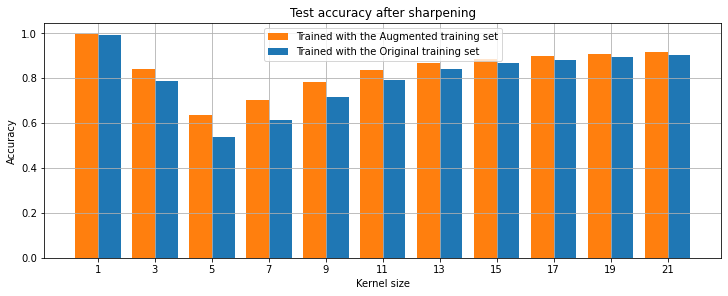

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 0.8  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,11)*2+1-0.4,sharp_2, width, color='tab:orange', label='Trained with the Augmented training set')
barlist2= axs.bar(np.arange(0,11)*2+1+0.4,sharp_1, width, color='tab:blue', label='Trained with the Original training set')





axs.set_xticks(np.arange(0,11)*2+1)#, rotation='vertical')
#axs.set_xlim(xmax=43,xmin=-1)
#axs.set_ylim(ymax=1.00,ymin=0.97)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Kernel size')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy after sharpening')
plt.legend()
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
plt.savefig(image_folder / 'sharp_m.png', dpi=500)

# plot sharp, modell 1

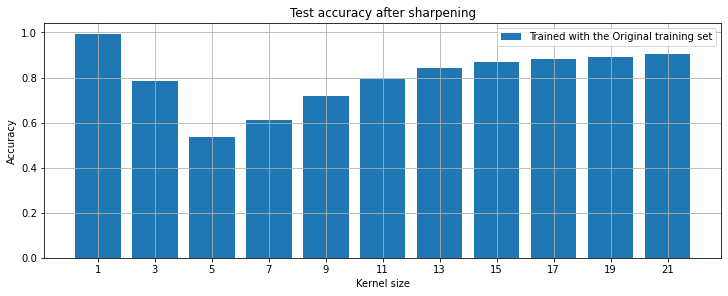

In [27]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 1.6  # the width of the bars
axs.grid(True)
barlist2= axs.bar(np.arange(0,11)*2+1,sharp_1, width, color='tab:blue', label='Trained with the Original training set')





axs.set_xticks(np.arange(0,11)*2+1)#, rotation='vertical')
#axs.set_xlim(xmax=43,xmin=-1)
#axs.set_ylim(ymax=1.00,ymin=0.97)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Kernel size')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy after sharpening')
plt.legend()
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
plt.savefig(image_folder / 'sharp_1.png', dpi=500)


# plot sharp, modell 2

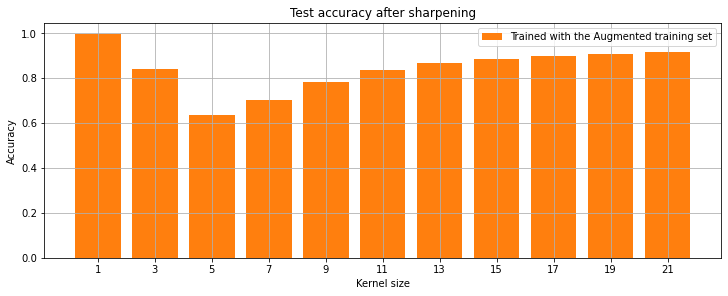

In [28]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4), constrained_layout=True)

width = 1.6  # the width of the bars
axs.grid(True)
barlist = axs.bar(np.arange(0,11)*2+1,sharp_2, width, color='tab:orange', label='Trained with the Augmented training set')





axs.set_xticks(np.arange(0,11)*2+1)#, rotation='vertical')
#axs.set_xlim(xmax=43,xmin=-1)
#axs.set_ylim(ymax=1.00,ymin=0.97)
#axs.set_yticks(np.arange(0,750,75))

axs.set_xlabel('Kernel size')
axs.set_ylabel('Accuracy')
axs.set_title('Test accuracy after sharpening')
plt.legend()
#plt.savefig('Class_accuracy_(freshtrained_model_trained_on_500_aug_images_per_class+orig_train).png', dpi=500)
plt.savefig(image_folder / 'sharp_2.png', dpi=500)

# Blur Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


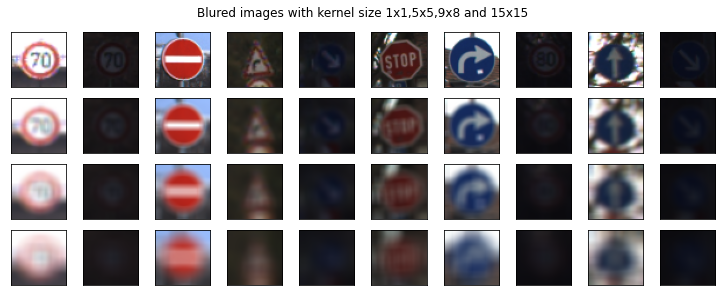

In [29]:
fig, axs = plt.subplots(nrows=4, ncols=10, figsize=(10, 4), constrained_layout=True)
fig.suptitle('Blured images with kernel size 1x1,5x5,9x8 and 15x15')




for i in range (0,10):
    for j in range(0,4):
        axs[j,i].set_xticks([])
        axs[j,i].set_yticks([])
    
    
    
    axs[0,i].imshow(blur_imgs(X_test,1,1)[0][i])
    axs[1,i].imshow(blur_imgs(X_test,1,5)[0][i])
    axs[2,i].imshow(blur_imgs(X_test,1,9)[0][i])
    axs[3,i].imshow(blur_imgs(X_test,1,15)[0][i])
plt.savefig('blur.png', dpi=500)    

# sharp Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

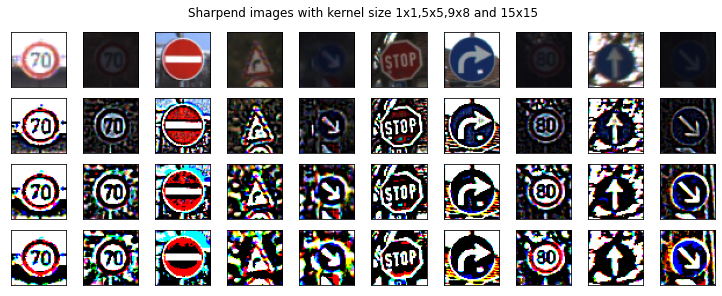

In [30]:
fig, axs = plt.subplots(nrows=4, ncols=10, figsize=(10, 4), constrained_layout=True)
fig.suptitle('Sharpend images with kernel size 1x1,5x5,9x8 and 15x15')




for i in range (0,10):
    for j in range(0,4):
        axs[j,i].set_xticks([])
        axs[j,i].set_yticks([])
    
    
    
    axs[0,i].imshow(sharpen(X_test,1,1)[0][i])
    axs[1,i].imshow(sharpen(X_test,1,5)[0][i])
    axs[2,i].imshow(sharpen(X_test,1,9)[0][i])
    axs[3,i].imshow(sharpen(X_test,1,15)[0][i])
plt.savefig('sharp.png', dpi=500)    

# image plot

NameError: name 'class_features' is not defined

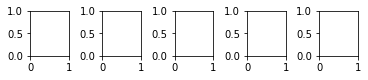

In [31]:
import matplotlib.pyplot as plt

# determines shape of the plot
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(5, 1), constrained_layout=True)

axs = axs.ravel()

#plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)

axs[0].imshow(class_features[14][0].astype('uint8'))
axs[0].set_xticks([])
axs[0].set_yticks([])

k = 1
for X_batch, y_batch in datagen.flow(np.reshape(class_features[14][0], (1,48,48,3)), np.reshape(class_labels[0][0],(1,43)), batch_size=9):
    axs[k].imshow(X_batch[0].astype('uint8'))
    #axs[k].imshow(class_features[14][0].astype('uint8'))
    axs[k].set_xticks([])
    axs[k].set_yticks([])
    if k == axs.shape[0]-1:
        break
    k += 1

plt.savefig('augmentation.png', dpi=500)
plt.show()